In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('/content/heart_v2.csv')
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


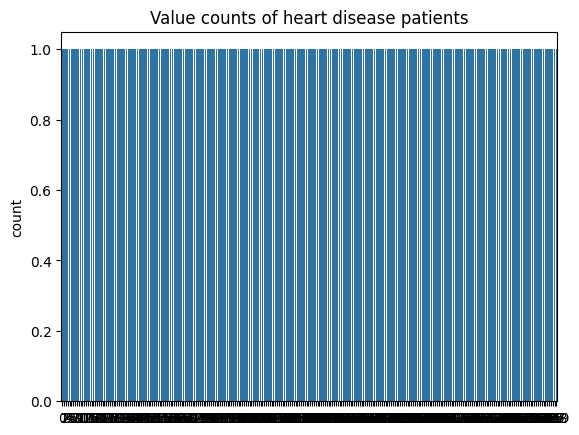

In [ ]:
sns.countplot(df['heart disease'])
plt.title('Value counts of heart disease patients')
plt.show()

In [ ]:
X=df.drop('heart disease',axis=1)    #X will have all colmns except heart disease
y=df['heart disease']  #y will have only heart disease colm

In [ ]:
#split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)   #0.2 means 20% for testng nd 80 for training

In [ ]:
X_train.shape,X_test.shape

((216, 4), (54, 4))

In [ ]:
y_train.shape,y_test.shape

((216,), (54,))

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(
    random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True
)
start_time=time.time()
#fit the model
classifier_rf.fit(X_train,y_train)
end_time=time.time()
print(f"Training completed in {end_time-start_time:.4f} seconds")

Training completed in 0.2785 seconds


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=classifier_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[25  8]
 [10 11]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.74        33
           1       0.58      0.52      0.55        21

    accuracy                           0.67        54
   macro avg       0.65      0.64      0.64        54
weighted avg       0.66      0.67      0.66        54



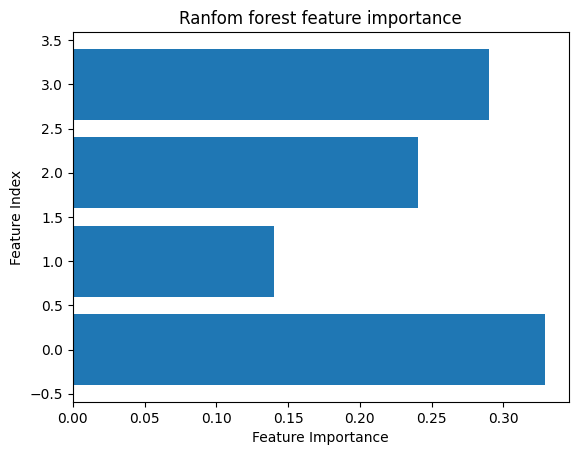

In [ ]:
importances=classifier_rf.feature_importances_
plt.barh(range(len(importances)),importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Ranfom forest feature importance')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#paramater grid
param_grid={
    'n_estimators':[100,200],
    'max_depth':[None,10,20]
}


In [ ]:
#base model
model=RandomForestRegressor()
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]})

In [ ]:
print("Best CV Score",grid_search.best_score_)


Best CV Score 0.006912141955672468


In [ ]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=10, n_estimators=200)

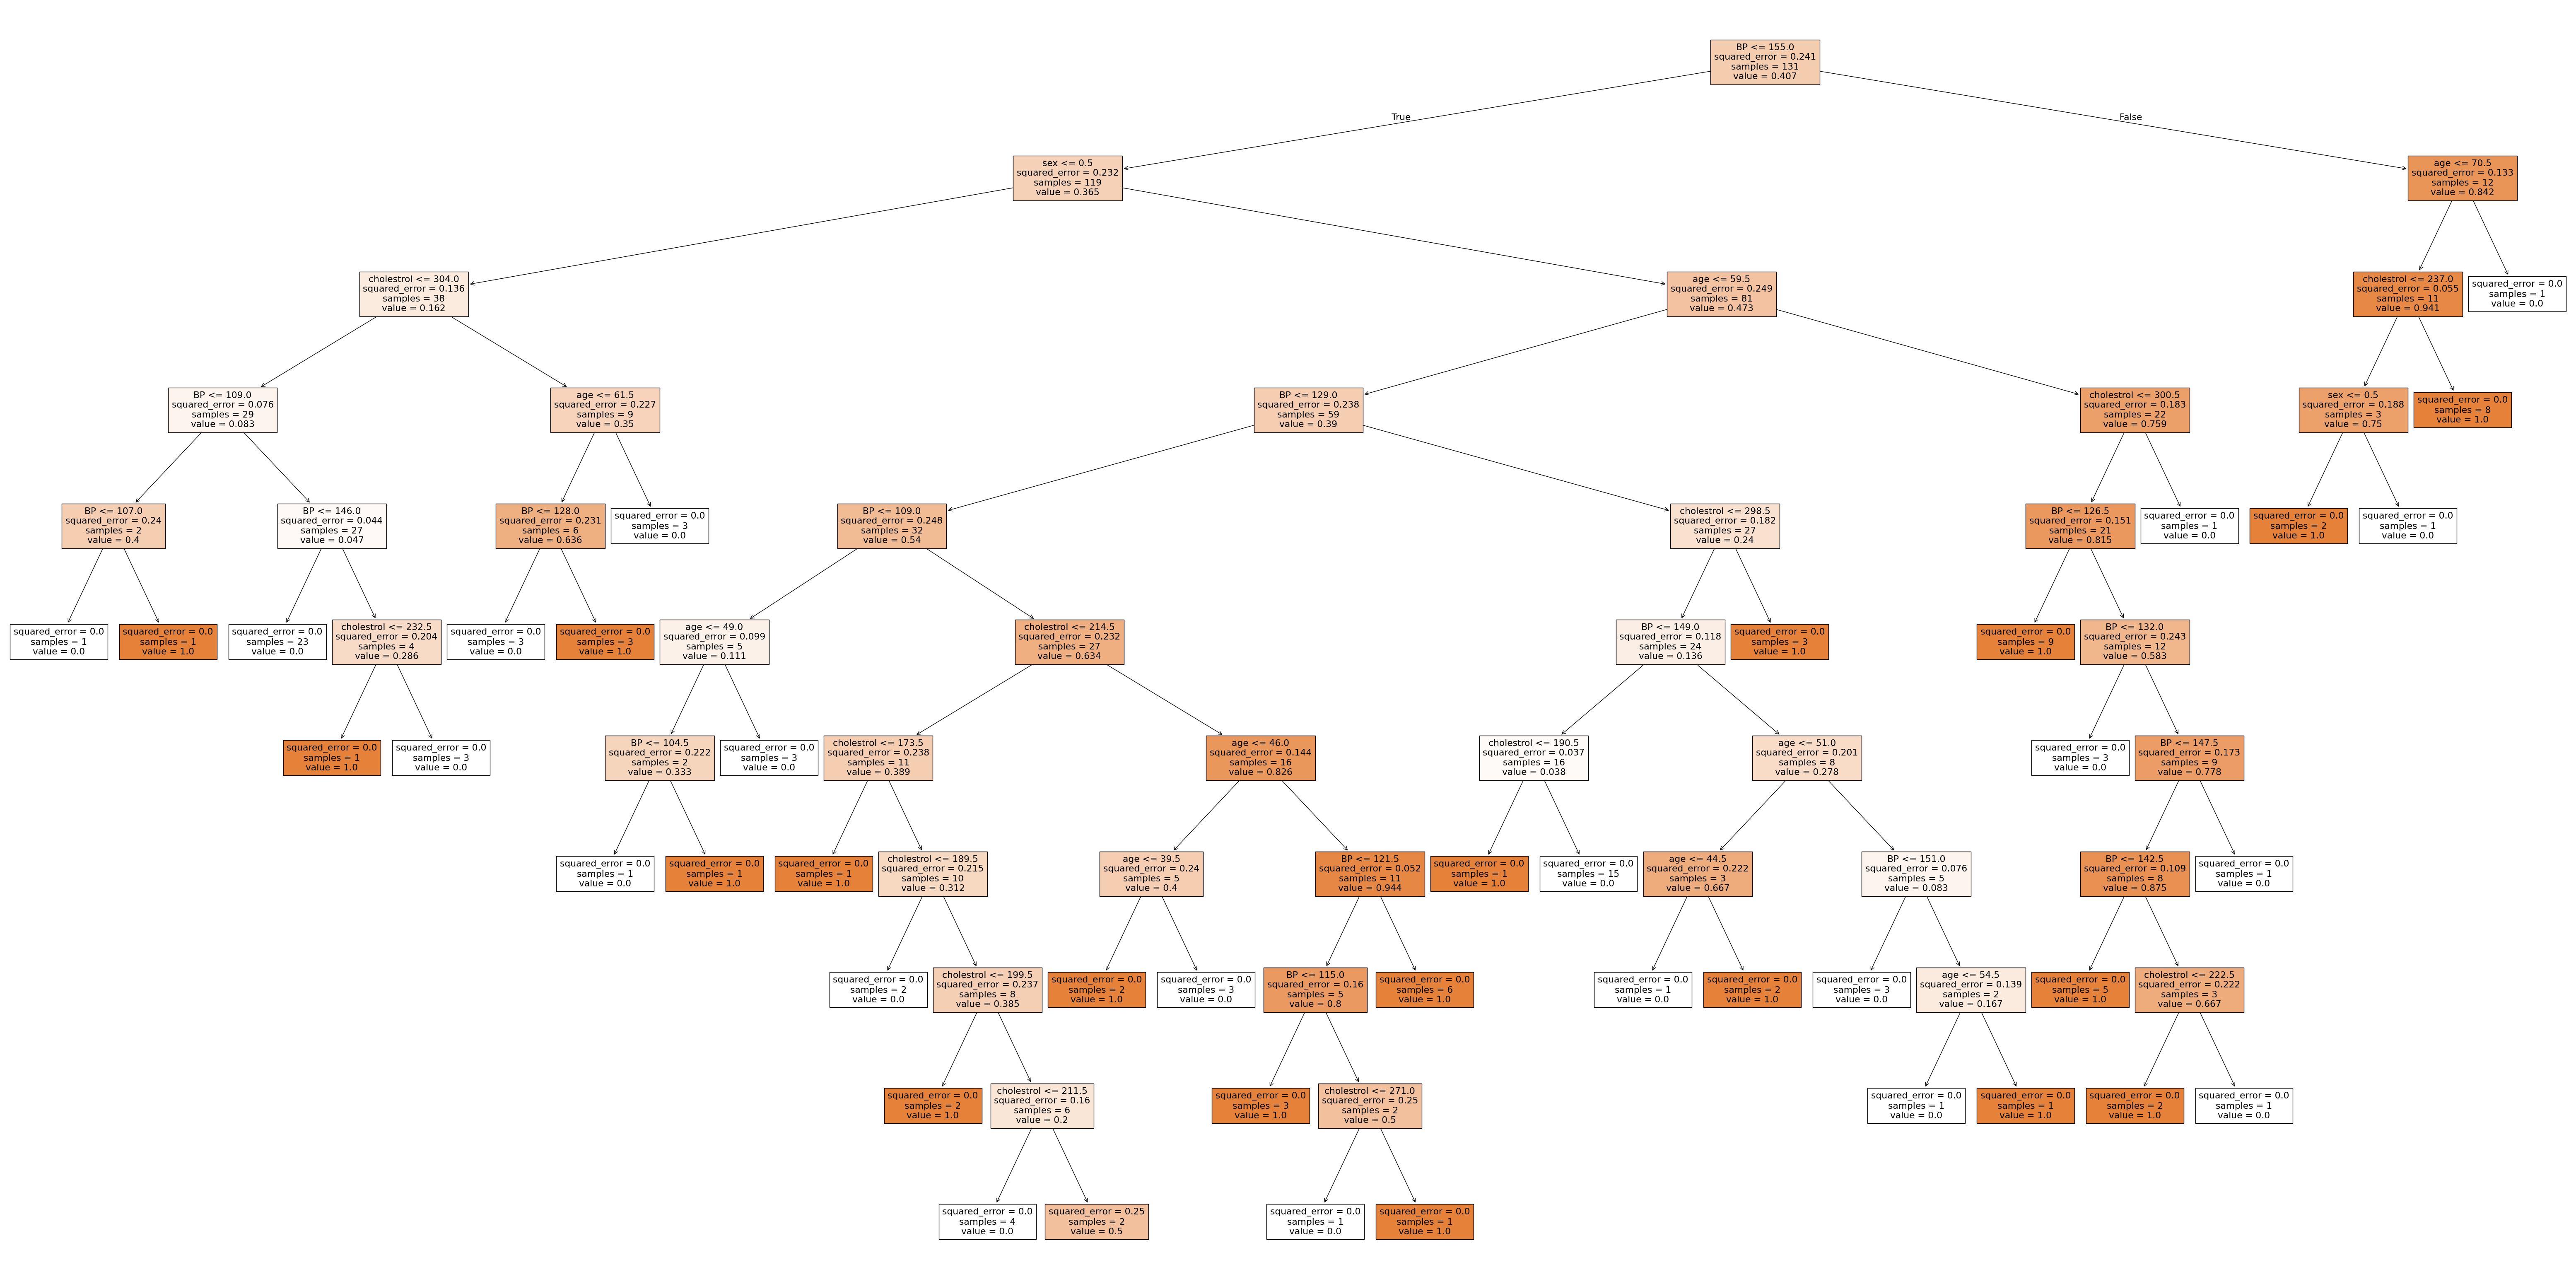

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],feature_names=X.columns,class_names=['Disease','No Disease'],filled=True);

In [ ]:
#RANDOM SEARCH

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


In [ ]:
#Define the model
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Define the parameter grid
random_param_grid={
    'n_estimators':np.arange(50,201,10),
    'max_depth':[None]+list(np.arange(5,30,5)),
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [ ]:
random_search=RandomizedSearchCV(estimator=rf,param_distributions=random_param_grid,cv=5,n_iter=20,verbose=1,n_jobs=-1,random_state=42)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, np.int64(5),
                                                      np.int64(10),
                                                      np.int64(15),
                                                      np.int64(20),
                                                      np.int64(25)],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200])},
                   random_state=42, verbose=1)

In [ ]:
#RESULTS
print("Best Parameters (Random Search):",random_search.best_params_)
print("Validation Score:",random_search.best_score_)
y_pred_random=random_search.predict(X_test)
print("Test Accuracy(Random Search):",accuracy_score(y_test,y_pred_random))

Best Parameters (Random Search): {'n_estimators': np.int64(110), 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': np.int64(5)}
Validation Score: 0.6714587737843551
Test Accuracy(Random Search): 0.6481481481481481
